# AIS

In [9]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import findspark
findspark.init()
import pyspark
pd.set_option('display.max_columns', None)  # Set to display all columns

ModuleNotFoundError: No module named 'findspark'

In [35]:
df_agroFood = pd.read_csv('Agrofood_co2_emission.csv', encoding='latin1')
df_co2Deforest = pd.read_csv('co2-deforestation-for-food.csv', encoding='latin1')
df_foodProduc = pd.read_csv('Food_Production.csv', encoding='latin1')
df_foodEmissions = pd.read_csv('food-emissions-supply-chain.csv', encoding='latin1')
df_ghg = pd.read_csv('ghg-per-kg-poore.csv', encoding='latin1')
df_foodLoss = pd.read_csv('global-food-loss-index.csv', encoding='latin1')
df_globalFood = pd.read_csv('global-food.csv', encoding='latin1')
df_globalFood2 = pd.read_csv('global-food(1).csv', encoding='latin1')
df_waterWithdrawals = pd.read_csv('water-withdrawals-per-kg-poore.csv', encoding='latin1')
df_continents = pd.read_csv('continents2.csv', encoding='latin1')

In [36]:
df_agroFood.tail()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature Â°C
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.0,251.1465,76500.2982,10662.4408,251.2681,443.0872,428.4352,22.9108,1077.2392,317.0744,2585.080847,858.982,96.1332,2721.1459,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.0,255.7975,76500.2982,10662.4408,203.1236,445.3881,304.7852,18.9857,1093.3441,332.7759,1227.240253,889.425,81.2314,2744.8763,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.0,327.0897,76500.2982,10662.4408,211.1539,492.8599,346.8512,19.0570,1108.5523,348.5107,1127.687805,966.265,81.0712,2790.0949,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.0,290.1893,76500.2982,10662.4408,228.6381,542.5922,350.2168,17.9514,1121.3255,327.8209,2485.528399,945.942,85.7211,2828.7215,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667
6964,Zimbabwe,2020,481.9027,48.4197,108.3022,7.9733,0.0,73.0,238.7639,76500.2982,10662.4408,213.9211,568.0445,350.2168,16.6754,1134.1634,307.4145,1227.240253,940.420,85.3143,2829.7457,266.7316,0.0,0.0,444.2335,11980005.0,5700460.0,7385220.0,8284447.0,96505.221853,0.189000


In [37]:
df_agroFood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

<Axes: >

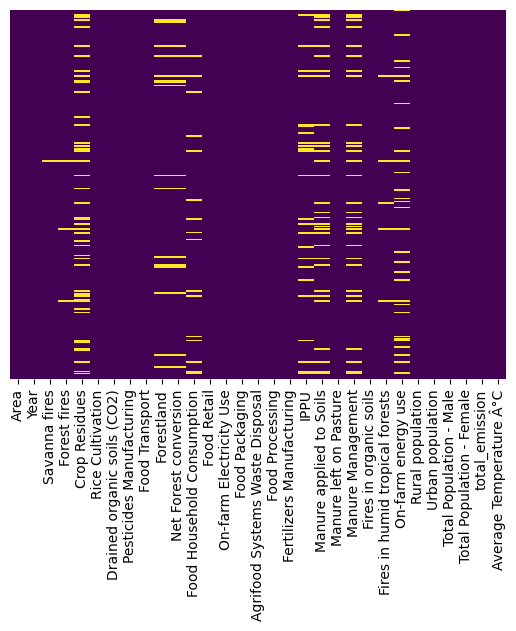

In [38]:
sns.heatmap(df_agroFood.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [39]:
# Remover dados de anos inferiores a 2010
df_agroFood = df_agroFood[df_agroFood['Year'] >= 2010]
df_agroFood

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature Â°C
20,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.610850,468.2530,121.9016,0.0000,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.379900,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,NaN,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.529250
21,Afghanistan,2011,1.8412,0.0000,335.0379,823.2000,0.0,81.610850,478.8137,-246.2191,0.0000,522.6275,270.6066,50.4527,339.833670,2610.1325,1299.824095,32.492700,192.3717,449.4714,2840.2660,843.1709,0.0,0.0,NaN,22594126.0,7114473.0,14780282.0,14468875.0,10925.534316,1.254583
22,Afghanistan,2012,2.8955,0.0000,445.5958,803.6000,0.0,107.386444,530.8213,-246.2191,0.0000,534.4065,271.2397,47.1675,339.833670,2743.2372,1326.917597,29.443300,266.4513,441.8546,2798.7363,836.9089,0.0,0.0,NaN,23280663.0,7416295.0,15399105.0,15067373.0,11280.276511,0.344167
23,Afghanistan,2013,3.1595,0.0000,455.0727,803.6000,0.0,76.061874,391.0777,-246.2191,0.0000,833.2319,276.2396,66.6996,353.930640,2870.4764,1441.160481,29.981400,333.5334,432.0026,2741.0994,832.8961,0.0,0.0,NaN,23997856.0,7733832.0,15946572.0,15594637.0,11694.004195,1.290917
24,Afghanistan,2014,2.6796,0.0000,473.4174,862.4000,0.0,49.782873,304.1804,-246.2191,0.0000,1094.1338,333.4255,78.6716,353.930640,2976.2524,1484.197070,28.639400,282.6155,437.6203,2770.4672,842.5037,0.0,0.0,NaN,24703798.0,8054222.0,16543889.0,16172321.0,12128.698284,0.468667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,10662.4408,251.2681,443.0872,428.4352,22.910800,1077.2392,317.074400,2585.080847,858.9820,96.1332,2721.1459,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,10662.4408,203.1236,445.3881,304.7852,18.985700,1093.3441,332.775900,1227.240253,889.4250,81.2314,2744.8763,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,10662.4408,211.1539,492.8599,346.8512,19.057000,1108.5523,348.510700,1127.687805,966.2650,81.0712,2790.0949,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,10662.4408,228.6381,542.5922,350.2168,17.951400,1121.3255,327.820900,2485.528399,945.9420,85.7211,2828.7215,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


In [40]:
df_agroFood = df_agroFood.rename(columns={'Area': 'Country', 'total_emission': 'Total_emissions'})
df_agroFood

,Country,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,Total_emissions,Average Temperature Â°C
20,Afghanistan,2010,24.8111,0.0000,413.6467,815.3600,0.0,81.610850,468.2530,121.9016,0.0000,286.0954,255.1159,53.3849,124.105574,2473.6065,514.115842,22.379900,192.3002,438.1226,2737.4933,849.3353,0.0,0.0,NaN,21966187.0,6836980.0,14240377.0,13949295.0,9871.638666,1.529250
21,Afghanistan,2011,1.8412,0.0000,335.0379,823.2000,0.0,81.610850,478.8137,-246.2191,0.0000,522.6275,270.6066,50.4527,339.833670,2610.1325,1299.824095,32.492700,192.3717,449.4714,2840.2660,843.1709,0.0,0.0,NaN,22594126.0,7114473.0,14780282.0,14468875.0,10925.534316,1.254583
22,Afghanistan,2012,2.8955,0.0000,445.5958,803.6000,0.0,107.386444,530.8213,-246.2191,0.0000,534.4065,271.2397,47.1675,339.833670,2743.2372,1326.917597,29.443300,266.4513,441.8546,2798.7363,836.9089,0.0,0.0,NaN,23280663.0,7416295.0,15399105.0,15067373.0,11280.276511,0.344167
23,Afghanistan,2013,3.1595,0.0000,455.0727,803.6000,0.0,76.061874,391.0777,-246.2191,0.0000,833.2319,276.2396,66.6996,353.930640,2870.4764,1441.160481,29.981400,333.5334,432.0026,2741.0994,832.8961,0.0,0.0,NaN,23997856.0,7733832.0,15946572.0,15594637.0,11694.004195,1.290917
24,Afghanistan,2014,2.6796,0.0000,473.4174,862.4000,0.0,49.782873,304.1804,-246.2191,0.0000,1094.1338,333.4255,78.6716,353.930640,2976.2524,1484.197070,28.639400,282.6155,437.6203,2770.4672,842.5037,0.0,0.0,NaN,24703798.0,8054222.0,16543889.0,16172321.0,12128.698284,0.468667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,10662.4408,251.2681,443.0872,428.4352,22.910800,1077.2392,317.074400,2585.080847,858.9820,96.1332,2721.1459,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,10662.4408,203.1236,445.3881,304.7852,18.985700,1093.3441,332.775900,1227.240253,889.4250,81.2314,2744.8763,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,10662.4408,211.1539,492.8599,346.8512,19.057000,1108.5523,348.510700,1127.687805,966.2650,81.0712,2790.0949,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,10662.4408,228.6381,542.5922,350.2168,17.951400,1121.3255,327.820900,2485.528399,945.9420,85.7211,2828.7215,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


In [41]:
df_co2Deforest

,Entity,Code,Year,total_embodied_emissions
0,Australia,AUS,2013,1.219255e+07
1,Austria,AUT,2013,3.021984e+06
2,Belgium,BEL,2013,1.082760e+07
3,Brazil,BRA,2013,5.447281e+08
4,Bulgaria,BGR,2013,6.481203e+05
5,Canada,CAN,2013,1.282691e+07
6,China,CHN,2013,1.931663e+08
7,Croatia,HRV,2013,5.138495e+05
8,Cyprus,CYP,2013,2.646826e+05
9,Czechia,CZE,2013,2.079429e+06


In [42]:
df_co2Deforest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Entity                    44 non-null     object 
 1   Code                      44 non-null     object 
 2   Year                      44 non-null     int64  
 3   total_embodied_emissions  44 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.5+ KB


In [43]:
# make a rename
df_co2Deforest = df_co2Deforest.rename(columns={"Entity": "Country", "total_embodied_emissions": "Total_emissions"})
to_drop = ["Code"]
df_co2Deforest = df_co2Deforest.drop(to_drop, axis=1)

In [44]:
df_co2Deforest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          44 non-null     object 
 1   Year             44 non-null     int64  
 2   Total_emissions  44 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ KB


In [45]:
# merge do df_agroFood e do df_co2Deforest pelo pais
df_agroCO2Deforest = pd.merge(df_agroFood, df_co2Deforest, on=['Country', 'Year'], how='inner')
df_agroCO2Deforest

,Country,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,Food Retail,On-farm Electricity Use,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,Total_emissions_x,Average Temperature Â°C,Total_emissions_y
0,Australia,2013,29147.2144,2839.5764,2420.2907,1002.287200,2860.7299,1958.0,9823.5901,-31963.9195,0.0000,11120.1077,7498.9633,1715.8224,5511.3713,5511.0977,8632.4437,729.746600,2.760650e+04,932.0787,25783.1462,6059.3181,0.0000,133.5757,6938.1280,3356405.0,19794324.0,11496392.0,11615389.0,1.262601e+05,1.462917,1.219255e+07
1,Austria,2013,0.0000,1.0419,241.3685,926.342278,287.2777,55.0,1839.7848,-7516.8522,354.2880,1197.6823,1225.0512,190.2452,683.3126,1589.8884,1285.1794,1933.271713,2.622446e+04,588.7079,400.5833,1509.5073,0.0000,0.0000,995.6374,3659591.0,4918191.0,4139378.0,4340160.0,3.401178e+04,1.268917,3.021984e+06
2,Belgium,2013,0.0000,0.0000,194.0567,715.871244,200.6195,112.0,1946.8745,-4876.7099,2355.3288,1464.7806,3059.0345,288.5365,696.3540,1589.2771,3257.9027,2012.447178,1.803115e+04,864.4312,446.8641,2364.2992,0.0000,0.0000,2009.5269,246557.0,10904955.0,5452515.0,5650743.0,3.673264e+04,0.536000,1.082760e+07
3,Brazil,2013,6156.2971,2800.8144,10147.0459,4280.101100,467.9481,7181.0,26576.5547,-519221.8123,780902.6977,20200.1560,12577.5346,3294.3732,3837.8398,85587.8669,5770.0452,6269.064000,5.966208e+04,10161.6722,87994.9695,12086.8517,0.0000,2774.7944,21347.5885,29937266.0,172471366.0,99355387.0,102366379.0,6.508555e+05,0.879667,5.447281e+08
4,Bulgaria,2013,2.2876,4.4238,524.0864,80.077800,1105.8794,38.0,557.5178,-13293.1260,0.0000,834.6286,583.7587,126.0451,318.6007,1017.2660,919.7089,2.166100,5.158877e+03,219.1492,200.2529,380.0146,0.0000,0.0000,585.7791,1939116.0,5327025.0,3599593.0,3831575.0,-6.346068e+02,1.525417,6.481203e+05
5,Canada,2013,1754.6096,608.2364,4283.0223,2188.614219,37562.9603,1881.0,19470.6907,22975.7406,92546.3974,8149.5703,5560.6582,1534.6946,3400.6891,6221.1250,3856.1248,19309.662300,6.637919e+04,1407.9050,4323.1672,7224.5368,0.0000,0.0000,17409.3824,6635934.0,28619561.0,17393361.0,17670329.0,3.280480e+05,0.853667,1.282691e+07
6,China,2013,232.6900,394.3597,30332.0010,150439.035100,3852.8405,11883.0,38065.9505,-711829.4710,0.0000,339609.9177,100994.7868,76299.1166,166234.6234,213289.7016,274253.5125,157082.454600,1.505971e+06,28769.9136,53283.9136,66504.5720,0.0000,0.0000,124511.8239,655323811.0,758533671.0,719701658.0,687619183.0,2.630176e+06,1.197417,1.931663e+08
7,Croatia,2013,0.3176,0.0000,167.0506,585.261279,9.9107,36.0,531.2104,-1510.9160,0.0000,346.9087,329.3985,30.5810,109.1923,941.7589,552.6113,1507.225100,3.541984e+03,176.7395,140.8670,493.7331,0.0000,0.0000,728.6454,1894797.0,2383009.0,2079934.0,2228919.0,8.718479e+03,1.404667,5.138495e+05
8,Cyprus,2013,1.1714,0.0000,4.7109,246.407276,0.0000,27.0,146.7611,-326.1576,8.9649,110.5739,158.7511,93.1524,23.0424,278.6166,158.7759,479.570015,1.242009e+03,31.1513,82.3762,73.1031,0.0000,0.0000,83.8894,375923.0,767973.0,584829.0,582139.0,2.923870e+03,1.067917,2.646826e+05
9,Czechia,2013,0.1104,0.5212,444.4044,813.956265,263.8570,136.0,1404.4711,-4845.0794,1090.4652,3062.7234,2264.4774,396.9891,639.4280,1660.7586,2106.1032,39.360100,9.317037e+03,409.0496,172.7841,739.6942,0.0000,0.0000,1342.8286,2829750.0,7764731.0,5163495.0,5351057.0,2.145994e+04,1.024583,2.079429e+06


<Axes: >

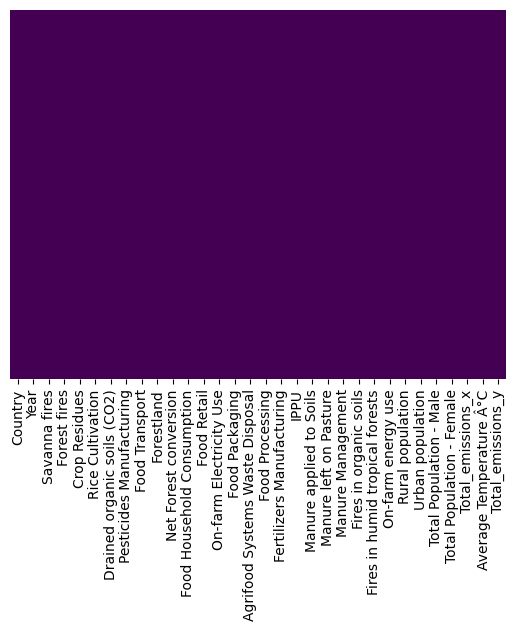

In [56]:
sns.heatmap(df_agroCO2Deforest.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [57]:
pd.set_option('display.max_columns', None)  # Set to display all columns

In [47]:
df_foodProduc.tail()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPOâeq per 1000kcal),Eutrophying emissions per kilogram (gPOâeq per kilogram),Eutrophying emissions per 100g protein (gPOâeq per 100 grams protein),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCOâeq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCOâeq per 100g protein),Land use per 1000kcal (mÂ² per 1000kcal),Land use per kilogram (mÂ² per kilogram),Land use per 100g protein (mÂ² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
38,Milk,0.5,0.2,1.5,0.1,0.1,0.1,0.3,2.8,17.750000,10.65,32.272727,1047.000000,1903.636364,628.2,5.250000,9.500000,14.916667,8.95,27.121212,19786.3,59958.48485,32977.16667
39,Cheese,4.5,2.3,13.1,0.7,0.1,0.2,0.3,21.2,25.418605,98.37,44.551630,1448.372093,2538.586957,5605.2,6.170543,10.815217,22.684755,87.79,39.759964,180850.6,81906.97464,46731.42119
40,Eggs,0.7,2.2,1.3,0.0,0.1,0.2,0.0,4.5,15.111111,21.76,19.610671,401.180556,520.638068,577.7,3.243056,4.208724,4.354167,6.27,5.650685,17982.7,16206.47080,12487.98611
41,Fish (farmed),0.5,0.8,3.6,0.0,0.1,0.1,0.0,5.1,131.351955,235.12,103.100197,2062.178771,1618.636264,3691.3,7.614525,5.976759,4.698324,8.41,3.687788,41572.2,18229.42337,23224.69274
42,Shrimps (farmed),0.2,2.5,8.4,0.0,0.2,0.3,0.2,11.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
df_foodProduc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                                                 43 

In [49]:
# make a rename
df_foodProduc = df_foodProduc.rename(columns={"Food product": "Food"})

In [50]:
df_foodEmissions.tail()

,Entity,Code,Year,food_emissions_land_use,food_emissions_farm,food_emissions_animal_feed,food_emissions_processing,food_emissions_transport,food_emissions_retail,food_emissions_packaging,food_emissions_losses
38,Sunflower Oil,NaN,2018,0.122421,1.976378,0.0,0.210714,0.184542,0.039322,0.784465,0.281636
39,Tofu,NaN,2018,0.958230,0.494701,0.0,0.793885,0.176925,0.270172,0.177361,0.290470
40,Tomatoes,NaN,2018,0.372987,0.705447,0.0,0.012382,0.177111,0.016692,0.145671,0.658417
41,Wheat & Rye,NaN,2018,0.097130,0.820300,0.0,0.210129,0.125441,0.056049,0.086839,0.177935
42,Wine,NaN,2018,-0.061264,0.626027,0.0,0.138626,0.093284,0.039322,0.749232,0.203536


In [51]:
# make a rename
df_foodEmissions = df_foodEmissions.rename(columns={"Entity": "Food", "food_emissions_land_use": "FE_land_use", "food_emissions_farm":"FE_farm","food_emissions_animal_feed":"FE_animal_feed","food_emissions_processing":"FE_processing"})
to_drop = ["Code"]
df_foodEmissions = df_foodEmissions.drop(to_drop, axis=1)

In [52]:
df_foodEmissions.tail()

,Food,Year,FE_land_use,FE_farm,FE_animal_feed,FE_processing,food_emissions_transport,food_emissions_retail,food_emissions_packaging,food_emissions_losses
38,Sunflower Oil,2018,0.122421,1.976378,0.0,0.210714,0.184542,0.039322,0.784465,0.281636
39,Tofu,2018,0.958230,0.494701,0.0,0.793885,0.176925,0.270172,0.177361,0.290470
40,Tomatoes,2018,0.372987,0.705447,0.0,0.012382,0.177111,0.016692,0.145671,0.658417
41,Wheat & Rye,2018,0.097130,0.820300,0.0,0.210129,0.125441,0.056049,0.086839,0.177935
42,Wine,2018,-0.061264,0.626027,0.0,0.138626,0.093284,0.039322,0.749232,0.203536


In [63]:
# merge dos datasets df_foodProduc e df_foodEmissions pela Food
df_foodProducEmissions = pd.merge(df_foodProduc, df_foodEmissions, on=['Food'], how='left')
df_foodProducEmissions = df_foodProducEmissions.sort_values(by='Food')
df_foodProducEmissions

,Food,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPOâeq per 1000kcal),Eutrophying emissions per kilogram (gPOâeq per kilogram),Eutrophying emissions per 100g protein (gPOâeq per 100 grams protein),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCOâeq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCOâeq per 100g protein),Land use per 1000kcal (mÂ² per 1000kcal),Land use per kilogram (mÂ² per kilogram),Land use per 100g protein (mÂ² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories),Year,FE_land_use,FE_farm,FE_animal_feed,FE_processing,food_emissions_transport,food_emissions_retail,food_emissions_packaging,food_emissions_losses
27,Apples,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.3,3.020833,1.45,48.333333,375.208333,6003.333333,180.1,0.895833,14.333333,1.312500,0.63,21.000000,12948.6,431620.000000,26976.250000,2018.0,-0.028951,0.225816,0.000000,0.003820,0.095804,0.016578,0.044526,0.070808
26,Bananas,0.0,0.0,0.3,0.1,0.3,0.1,0.0,0.8,5.483333,3.29,36.555556,190.833333,1272.222222,114.5,1.433333,9.555556,3.216667,1.93,21.444444,661.9,7354.444444,1103.166667,2018.0,-0.025534,0.269618,0.000000,0.060146,0.295830,0.020981,0.065670,0.175185
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,Beef (beef herd),16.3,1.9,39.4,1.3,0.3,0.2,0.2,59.6,110.406593,301.41,151.158475,531.575092,727.783350,1451.2,36.439560,49.889669,119.490842,326.21,163.595787,34732.5,17418.505520,12722.527470,2018.0,23.237536,56.228063,2.680979,1.811083,0.494125,0.233538,0.352084,14.439998
34,Beef (dairy herd),0.9,2.5,15.7,1.1,0.4,0.3,0.2,21.1,133.805861,365.29,185.050659,994.249084,1375.025329,2714.3,12.197802,16.869301,15.838828,43.24,21.904762,119805.2,60691.590680,43884.688640,2018.0,1.266022,21.915529,3.503673,1.547664,0.592410,0.254032,0.374549,3.847515
8,Beet Sugar,0.0,0.0,0.5,0.2,0.6,0.1,0.0,1.4,1.541311,5.41,NaN,62.022792,NaN,217.7,0.515670,NaN,0.521368,1.83,NaN,9493.3,NaN,2704.643875,2018.0,0.000052,0.535721,0.000000,0.241885,0.628544,0.039322,0.090289,0.276263
28,Berries & Grapes,0.0,0.0,0.7,0.0,0.2,0.2,0.0,1.1,10.736842,6.12,61.200000,736.140351,4196.000000,419.6,2.684211,15.300000,4.228070,2.41,24.100000,21162.1,211621.000000,37126.491230,2018.0,0.024601,0.717848,0.000000,0.000000,0.236392,0.017057,0.211092,0.324895
23,Brassicas,0.0,0.0,0.3,0.0,0.1,0.0,0.0,0.4,29.470588,5.01,45.545455,702.352941,1085.454545,119.4,3.000000,4.636364,3.235294,0.55,5.000000,8455.1,76864.545450,49735.882350,2018.0,0.002242,0.277745,0.000000,0.000000,0.094641,0.016844,0.045303,0.077781
7,Cane Sugar,1.2,0.0,0.5,0.0,0.8,0.1,0.0,2.6,4.820513,16.92,NaN,176.666667,NaN,620.1,0.911681,NaN,0.581197,2.04,NaN,16438.6,NaN,4683.361823,2018.0,1.263041,0.491270,0.000000,0.037381,0.794510,0.036723,0.084277,0.491722
6,Cassava,0.6,0.0,0.2,0.0,0.1,0.0,0.0,0.9,0.708419,0.69,7.666667,NaN,NaN,0.0,1.355236,14.666667,1.858316,1.81,20.111111,0.0,NaN,NaN,2018.0,0.589436,0.219994,0.000000,0.000000,0.093597,0.039322,0.044822,0.328504


/home/marta/.local/lib/python3.10/site-packages/seaborn/utils.py:84: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.draw()
/home/marta/.local/lib/python3.10/site-packages/seaborn/utils.py:84: UserWarning: Glyph 132 (\x84) missing from current font.
  fig.canvas.draw()


<Axes: >

/home/marta/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 130 (\x82) missing from current font.
  func(*args, **kwargs)
/home/marta/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 132 (\x84) missing from current font.
  func(*args, **kwargs)
/home/marta/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/marta/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 132 (\x84) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


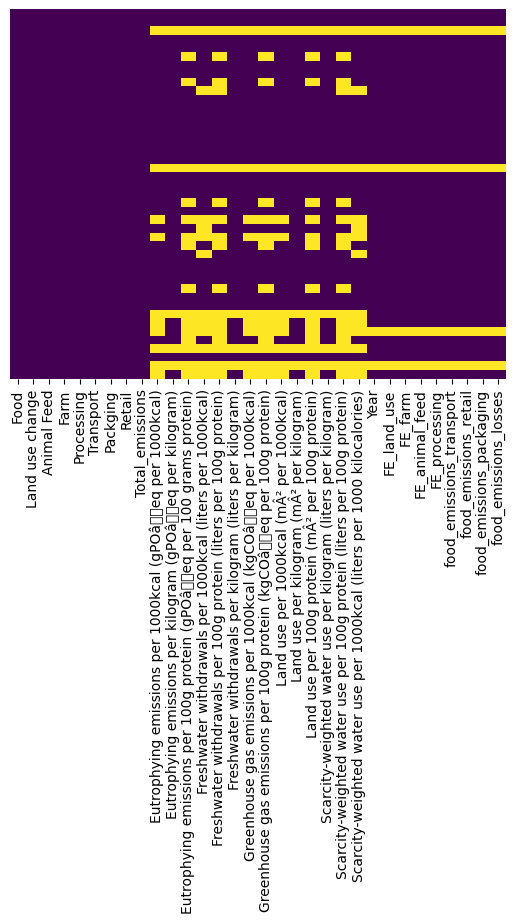

In [64]:
sns.heatmap(df_foodProducEmissions.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [53]:
df_ghg.tail()

,Entity,Code,Year,"GHG emissions per kilogram (Poore & Nemecek, 2018)"
33,Soy milk,NaN,2010,0.98
34,Tofu,NaN,2010,3.16
35,Tomatoes,NaN,2010,2.09
36,Wheat & Rye,NaN,2010,1.57
37,Wine,NaN,2010,1.79


In [54]:
# make a rename
df_ghg = df_ghg.rename(columns={"Entity": "Food", "GHG emissions per kilogram (Poore & Nemecek, 2018)": "Total_emission_GHG"})
to_drop = ["Code"]
df_ghg = df_ghg.drop(to_drop, axis=1)

In [55]:
df_ghg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Food                38 non-null     object 
 1   Year                38 non-null     int64  
 2   Total_emission_GHG  38 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.0+ KB


In [65]:
df_ghg["Food"].value_counts()

Food
Apples               1
Potatoes             1
Oatmeal              1
Onions & Leeks       1
Other Fruit          1
Other Pulses         1
Other Vegetables     1
Peas                 1
Pig Meat             1
Poultry Meat         1
Bananas              1
Prawns (farmed)      1
Rice                 1
Root Vegetables      1
Soy milk             1
Tofu                 1
Tomatoes             1
Wheat & Rye          1
Nuts                 1
Milk                 1
Maize                1
Lamb & Mutton        1
Barley               1
Beef (beef herd)     1
Beef (dairy herd)    1
Beet Sugar           1
Berries & Grapes     1
Brassicas            1
Cane Sugar           1
Cassava              1
Cheese               1
Citrus Fruit         1
Coffee               1
Dark Chocolate       1
Eggs                 1
Fish (farmed)        1
Groundnuts           1
Wine                 1
Name: count, dtype: int64

In [42]:
df_foodLoss

,Entity,Code,Year,12.3.1 - Global food loss index - AG_FLS_INDEX
0,Central and Southern Asia (UN),NaN,2016,96.76
1,Central and Southern Asia (UN),NaN,2020,94.91
2,Central and Southern Asia (UN),NaN,2021,88.70
3,Eastern and South-Eastern Asia (UN),NaN,2016,99.06
4,Eastern and South-Eastern Asia (UN),NaN,2020,99.48
5,Eastern and South-Eastern Asia (UN),NaN,2021,99.97
6,Europe and Northern America (UN),NaN,2016,99.49
7,Europe and Northern America (UN),NaN,2020,106.53
8,Europe and Northern America (UN),NaN,2021,100.94
9,Latin America and the Caribbean (UN),NaN,2016,99.84


In [43]:
# make a rename
df_foodLoss = df_foodLoss.rename(columns={"Entity": "Region", "12.3.1 - Global food loss index - AG_FLS_INDEX": "Global_food_loss_index"})
to_drop = ["Code"]
df_foodLoss = df_foodLoss.drop(to_drop, axis=1)

In [44]:
df_foodLoss.tail()

,Region,Year,Global_food_loss_index
25,Sub-Saharan Africa (UN),2020,103.27
26,Sub-Saharan Africa (UN),2021,98.89
27,World,2016,98.69
28,World,2020,101.20
29,World,2021,98.27


In [45]:
df_foodLoss.rename({'Northen Africa (UN)': 'Northen Africa', 'Northern America (UN)':'Northern America', }, inplace=True)
df_foodLoss

,Region,Year,Global_food_loss_index
0,Central and Southern Asia (UN),2016,96.76
1,Central and Southern Asia (UN),2020,94.91
2,Central and Southern Asia (UN),2021,88.70
3,Eastern and South-Eastern Asia (UN),2016,99.06
4,Eastern and South-Eastern Asia (UN),2020,99.48
5,Eastern and South-Eastern Asia (UN),2021,99.97
6,Europe and Northern America (UN),2016,99.49
7,Europe and Northern America (UN),2020,106.53
8,Europe and Northern America (UN),2021,100.94
9,Latin America and the Caribbean (UN),2016,99.84


### *Tratar do dataset de global food*

In [63]:
df_globalFood

,Product,Country,Year,Population,Production (t),production__tonnes__per_capita,Production per capita (kg),Yield (t/ha),Yield (kg/animal),Land Use (ha),...,other_uses__tonnes__per_capita,Other uses per capita (kg),Supply chain waste (t),waste_in_supply_chain__tonnes__per_capita,Supply chain waste per capita (kg),Food supply (kg per capita per year),Food supply (g per capita per day),Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Food supply (Fat g per capita per day)
0,NaN,Afghanistan,1961,8790140.0,700000.0,0.079635,79.634680,1.4000,NaN,500000.0,...,NaN,NaN,70000.0,0.007963,7.963468,45.787930,125.446382,387.08370,10.237346,5.439545
1,NaN,Afghanistan,1962,8969055.0,700000.0,0.078046,78.046130,1.4000,NaN,500000.0,...,NaN,NaN,70000.0,0.007805,7.804613,44.879000,122.956163,379.35650,10.029739,5.330847
2,NaN,Afghanistan,1963,9157463.0,713000.0,0.077860,77.859990,1.4260,NaN,500000.0,...,NaN,NaN,71000.0,0.007753,7.753239,44.785263,122.699349,378.59918,10.015743,5.324051
3,NaN,Afghanistan,1964,9355510.0,720000.0,0.076960,76.960000,1.4257,NaN,505000.0,...,NaN,NaN,72000.0,0.007696,7.696000,44.308723,121.393760,374.53220,9.908746,5.265616
4,NaN,Afghanistan,1965,9565154.0,720000.0,0.075273,75.273220,1.4400,NaN,500000.0,...,NaN,NaN,72000.0,0.007527,7.527323,43.336914,118.731270,366.32706,9.688275,5.145301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13396,NaN,Zimbabwe,2017,14751101.0,1532572.0,0.103895,103.895430,1.3933,NaN,1099945.0,...,NaN,NaN,70000.0,0.004745,4.745408,88.105850,241.385888,698.69900,18.404848,7.518289
13397,NaN,Zimbabwe,2018,15052191.0,1560100.0,0.103646,103.646040,1.3506,NaN,1155075.0,...,NaN,NaN,71000.0,0.004717,4.716921,86.351590,236.579696,684.82710,18.043474,7.376625
13398,NaN,Zimbabwe,2019,15354606.0,773976.0,0.050407,50.406765,0.7807,NaN,991354.0,...,NaN,NaN,27000.0,0.001758,1.758430,64.802260,177.540437,564.02010,14.860454,6.075808
13399,NaN,Zimbabwe,2020,15669663.0,1202347.0,0.076731,76.730880,1.1801,NaN,1018884.0,...,NaN,NaN,99000.0,0.006318,6.317940,73.215920,200.591560,637.26965,16.788727,6.857768


In [64]:
df_globalFood = df_globalFood[df_globalFood['Year'] >= 2010]
df_globalFood

,Product,Country,Year,Population,Production (t),production__tonnes__per_capita,Production per capita (kg),Yield (t/ha),Yield (kg/animal),Land Use (ha),...,other_uses__tonnes__per_capita,Other uses per capita (kg),Supply chain waste (t),waste_in_supply_chain__tonnes__per_capita,Supply chain waste per capita (kg),Food supply (kg per capita per year),Food supply (g per capita per day),Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Food supply (Fat g per capita per day)
49,NaN,Afghanistan,2010,28189672.0,301000.0,0.010678,10.677669,1.6448,NaN,183000.0,...,NaN,NaN,45000.0,0.001596,1.596329,1.905032,5.219267,16.099596,0.424491,0.227776
50,NaN,Afghanistan,2011,29249156.0,300120.0,0.010261,10.260809,1.6400,NaN,183000.0,...,NaN,NaN,45000.0,0.001539,1.538506,1.925484,5.275299,16.309984,0.432462,0.226528
51,NaN,Afghanistan,2012,30466484.0,310000.0,0.010175,10.175115,2.1986,NaN,141000.0,...,NaN,NaN,47000.0,0.001543,1.542679,1.830805,5.015904,15.464677,0.409118,0.214787
52,NaN,Afghanistan,2013,31541216.0,312000.0,0.009892,9.891819,2.1972,NaN,142000.0,...,NaN,NaN,47000.0,0.001490,1.490114,1.698356,4.653029,14.364405,0.378549,0.204621
53,NaN,Afghanistan,2014,32716214.0,316000.0,0.009659,9.658819,2.4882,NaN,127000.0,...,0.000214,0.213961,47000.0,0.001437,1.436597,2.713237,7.433527,22.919716,0.601808,0.326404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13396,NaN,Zimbabwe,2017,14751101.0,1532572.0,0.103895,103.895430,1.3933,NaN,1099945.0,...,NaN,NaN,70000.0,0.004745,4.745408,88.105850,241.385888,698.699000,18.404848,7.518289
13397,NaN,Zimbabwe,2018,15052191.0,1560100.0,0.103646,103.646040,1.3506,NaN,1155075.0,...,NaN,NaN,71000.0,0.004717,4.716921,86.351590,236.579696,684.827100,18.043474,7.376625
13398,NaN,Zimbabwe,2019,15354606.0,773976.0,0.050407,50.406765,0.7807,NaN,991354.0,...,NaN,NaN,27000.0,0.001758,1.758430,64.802260,177.540437,564.020100,14.860454,6.075808
13399,NaN,Zimbabwe,2020,15669663.0,1202347.0,0.076731,76.730880,1.1801,NaN,1018884.0,...,NaN,NaN,99000.0,0.006318,6.317940,73.215920,200.591560,637.269650,16.788727,6.857768


In [65]:
df_globalFood2

,Product,Country,Year,Population,Production (t),production__tonnes__per_capita,Production per capita (kg),Yield (t/ha),Yield (kg/animal),Land Use (ha),...,other_uses__tonnes__per_capita,Other uses per capita (kg),Supply chain waste (t),waste_in_supply_chain__tonnes__per_capita,Supply chain waste per capita (kg),Food supply (kg per capita per year),Food supply (g per capita per day),Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Food supply (Fat g per capita per day)
0,NaN,Afghanistan,1961,8790140.0,291300.00,0.033139,33.139404,4.2402,NaN,68700.0,...,NaN,NaN,41000.0,0.004664,4.664317,37.435070,102.561835,22.410109,1.201997,0.183355
1,NaN,Afghanistan,1962,8969055.0,306300.00,0.034151,34.150753,4.4585,NaN,68700.0,...,NaN,NaN,42000.0,0.004683,4.682768,38.192513,104.637021,22.424213,1.233332,0.193664
2,NaN,Afghanistan,1963,9157463.0,324600.00,0.035446,35.446500,4.7249,NaN,68700.0,...,NaN,NaN,45000.0,0.004914,4.914025,39.644800,108.615889,23.458462,1.285116,0.193787
3,NaN,Afghanistan,1964,9355510.0,342900.00,0.036652,36.652196,4.6526,NaN,73700.0,...,NaN,NaN,48000.0,0.005131,5.130666,40.992203,112.307404,24.491236,1.326609,0.204094
4,NaN,Afghanistan,1965,9565154.0,357500.00,0.037375,37.375250,4.4856,NaN,79700.0,...,NaN,NaN,49000.0,0.005123,5.122761,41.683067,114.200182,24.501434,1.347579,0.204179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14057,NaN,Zimbabwe,2017,14751101.0,232628.50,0.015770,15.770247,6.7140,NaN,34648.0,...,NaN,NaN,20000.0,0.001356,1.355831,14.882158,40.773035,9.651205,0.569421,0.086861
14058,NaN,Zimbabwe,2018,15052191.0,236034.77,0.015681,15.681090,6.6013,NaN,35756.0,...,NaN,NaN,20000.0,0.001329,1.328710,14.570992,39.920526,9.592490,0.556364,0.086332
14059,NaN,Zimbabwe,2019,15354606.0,233508.66,0.015208,15.207727,6.6678,NaN,35020.0,...,NaN,NaN,19000.0,0.001237,1.237414,13.496497,36.976704,9.538160,0.524599,0.076305
14060,NaN,Zimbabwe,2020,15669663.0,234587.97,0.014971,14.970837,6.5932,NaN,35580.0,...,NaN,NaN,19000.0,0.001213,1.212534,13.212823,36.199515,9.485156,0.512198,0.075881


In [66]:
df_globalFood2 = df_globalFood2[df_globalFood2['Year'] >= 2010]
df_globalFood2

,Product,Country,Year,Population,Production (t),production__tonnes__per_capita,Production per capita (kg),Yield (t/ha),Yield (kg/animal),Land Use (ha),...,other_uses__tonnes__per_capita,Other uses per capita (kg),Supply chain waste (t),waste_in_supply_chain__tonnes__per_capita,Supply chain waste per capita (kg),Food supply (kg per capita per year),Food supply (g per capita per day),Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Food supply (Fat g per capita per day)
49,NaN,Afghanistan,2010,28189672.0,969763.10,0.034401,34.401360,10.670199,NaN,90885.0,...,NaN,NaN,167000.0,0.005924,5.924156,45.078865,123.503738,28.989624,1.190645,0.196715
50,NaN,Afghanistan,2011,29249156.0,762948.50,0.026084,26.084462,10.309299,NaN,74006.0,...,NaN,NaN,129000.0,0.004410,4.410384,39.178970,107.339643,24.712097,1.081154,0.175044
51,NaN,Afghanistan,2012,30466484.0,817743.50,0.026841,26.840758,10.229700,NaN,79938.0,...,NaN,NaN,127000.0,0.004169,4.168515,38.538956,105.586180,24.547106,1.104620,0.184103
52,NaN,Afghanistan,2013,31541216.0,790266.94,0.025055,25.055056,10.026000,NaN,78821.0,...,NaN,NaN,117000.0,0.003709,3.709432,35.419920,97.040876,22.508327,1.053799,0.173928
53,NaN,Afghanistan,2014,32716214.0,973721.60,0.029763,29.762663,9.740900,NaN,99962.0,...,NaN,NaN,167000.0,0.005105,5.104503,49.817490,136.486273,33.660465,1.560622,0.265204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14057,NaN,Zimbabwe,2017,14751101.0,232628.50,0.015770,15.770247,6.714000,NaN,34648.0,...,NaN,NaN,20000.0,0.001356,1.355831,14.882158,40.773035,9.651205,0.569421,0.086861
14058,NaN,Zimbabwe,2018,15052191.0,236034.77,0.015681,15.681090,6.601300,NaN,35756.0,...,NaN,NaN,20000.0,0.001329,1.328710,14.570992,39.920526,9.592490,0.556364,0.086332
14059,NaN,Zimbabwe,2019,15354606.0,233508.66,0.015208,15.207727,6.667800,NaN,35020.0,...,NaN,NaN,19000.0,0.001237,1.237414,13.496497,36.976704,9.538160,0.524599,0.076305
14060,NaN,Zimbabwe,2020,15669663.0,234587.97,0.014971,14.970837,6.593200,NaN,35580.0,...,NaN,NaN,19000.0,0.001213,1.212534,13.212823,36.199515,9.485156,0.512198,0.075881


In [67]:
df_waterWithdrawals.tail()

,Entity,Code,Year,"Freshwater withdrawals per kilogram (Poore & Nemecek, 2018)"
33,Soy milk,NaN,2010,27.8
34,Tofu,NaN,2010,148.6
35,Tomatoes,NaN,2010,369.8
36,Wheat & Rye,NaN,2010,647.5
37,Wine,NaN,2010,78.9


In [68]:
# make a rename
df_waterWithdrawals = df_waterWithdrawals.rename(columns={"Entity": "Food", "Freshwater withdrawals per kilogram (Poore & Nemecek, 2018)": "Freshwater_withdrawals_per_Kg"})
to_drop = ["Code"]
df_waterWithdrawals = df_waterWithdrawals.drop(to_drop, axis=1)

In [69]:
df_continents.rename(columns={'ï»¿name': 'name'}, inplace=True)
df_continents

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Ã land Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF,Oceania,Polynesia,NaN,9.0,61.0,NaN
245,Western Sahara,EH,ESH,732,ISO 3166-2:EH,Africa,Northern Africa,NaN,2.0,15.0,NaN
246,Yemen,YE,YEM,887,ISO 3166-2:YE,Asia,Western Asia,NaN,142.0,145.0,NaN
247,Zambia,ZM,ZMB,894,ISO 3166-2:ZM,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0


In [70]:
df_continents = df_continents[['name', 'region', 'sub-region', 'intermediate-region']]
df_continents

,name,region,sub-region,intermediate-region
0,Afghanistan,Asia,Southern Asia,NaN
1,Ã land Islands,Europe,Northern Europe,NaN
2,Albania,Europe,Southern Europe,NaN
3,Algeria,Africa,Northern Africa,NaN
4,American Samoa,Oceania,Polynesia,NaN
...,...,...,...,...
244,Wallis and Futuna,Oceania,Polynesia,NaN
245,Western Sahara,Africa,Northern Africa,NaN
246,Yemen,Asia,Western Asia,NaN
247,Zambia,Africa,Sub-Saharan Africa,Eastern Africa


# Data Preperation

## Years and Countries